# GDP data as extra

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import json
from scipy import stats

In [2]:
csv_fifteen = "Resources/2015.csv"
df_fifteen = pd.read_csv(csv_fifteen)
df_fifteen = df_fifteen[["Country", "Economy (GDP per Capita)"]]
df_fifteen = df_fifteen.rename(columns={"Economy (GDP per Capita)":"Economy (2015)"})
df_fifteen.head()

,Country,Economy (2015)
0,Switzerland,1.39651
1,Iceland,1.30232
2,Denmark,1.32548
3,Norway,1.45900
4,Canada,1.32629


In [3]:
csv_sixteen = "Resources/2016.csv"
df_sixteen = pd.read_csv(csv_sixteen)
df_sixteen = df_sixteen[["Country", "Economy (GDP per Capita)"]]
df_sixteen = df_sixteen.rename(columns={"Economy (GDP per Capita)":"Economy (2016)"})
df_sixteen.head()

,Country,Economy (2016)
0,Denmark,1.44178
1,Switzerland,1.52733
2,Iceland,1.42666
3,Norway,1.57744
4,Finland,1.40598


In [4]:
csv_seventeen = "Resources/2017.csv"
df_seventeen = pd.read_csv(csv_seventeen)
df_seventeen = df_seventeen[["Country", "Economy..GDP.per.Capita."]]
df_seventeen = df_seventeen.rename(columns={"Economy..GDP.per.Capita.":"Economy (2017)"})
df_seventeen.head()

,Country,Economy (2017)
0,Norway,1.616463
1,Denmark,1.482383
2,Iceland,1.480633
3,Switzerland,1.564980
4,Finland,1.443572


In [5]:
csv_eighteen = "Resources/2018.csv"
df_eighteen = pd.read_csv(csv_eighteen)
df_eighteen = df_eighteen[["Country or region", "GDP per capita"]]
df_eighteen = df_eighteen.rename(columns={"Country or region": "Country",
                                          "GDP per capita":"Economy (2018)"})
df_eighteen.head()

,Country,Economy (2018)
0,Finland,1.305
1,Norway,1.456
2,Denmark,1.351
3,Iceland,1.343
4,Switzerland,1.420


In [6]:
csv_nineteen = "Resources/2019.csv"
df_nineteen = pd.read_csv(csv_nineteen)
df_nineteen = df_nineteen[["Country or region", "GDP per capita"]]
df_nineteen = df_nineteen.rename(columns={"Country or region": "Country",
                                          "GDP per capita":"Economy (2019)"})
df_nineteen.head()

,Country,Economy (2019)
0,Finland,1.340
1,Denmark,1.383
2,Norway,1.488
3,Iceland,1.380
4,Netherlands,1.396


In [7]:
csv_twenty_two = "Resources/2022.csv"
df_twenty_two = pd.read_csv(csv_twenty_two)
df_twenty_two = df_twenty_two[["Country", "Explained by: GDP per capita"]]
df_twenty_two = df_twenty_two.rename(columns={"Explained by: GDP per capita":"Economy (2022)"})
df_twenty_two.head()

,Country,Economy (2022)
0,Finland,1.892
1,Denmark,1.953
2,Iceland,1.936
3,Switzerland,2.026
4,Netherlands,1.945


In [8]:
merge_fifteen_sixteen = pd.merge(df_fifteen, df_sixteen, on="Country", how="outer").dropna()
merge_in_seventeen = pd.merge(merge_fifteen_sixteen, df_seventeen, on="Country", how="outer").dropna()
merge_in_eighteen = pd.merge(merge_in_seventeen, df_eighteen, on="Country", how="outer").dropna()
merge_in_nineteen = pd.merge(merge_in_eighteen, df_nineteen, on="Country", how="outer").dropna()
merged_twenty_two = pd.merge(merge_in_nineteen, df_twenty_two, on="Country", how="outer").dropna()
merged_twenty_two.count()

Country           117
Economy (2015)    117
Economy (2016)    117
Economy (2017)    117
Economy (2018)    117
Economy (2019)    117
Economy (2022)    117
dtype: int64

In [9]:
merged_twenty_two.to_csv("Output_data/GDP_df.csv", index_label="Index")

In [10]:
csv = pd.read_csv("Output_data/GDP_df.csv", index_col="Index")
csv.head()

,Country,Economy (2015),Economy (2016),Economy (2017),Economy (2018),Economy (2019),Economy (2022)
Index,,,,,,,
0,Switzerland,1.39651,1.52733,1.564980,1.420,1.452,2.026
1,Iceland,1.30232,1.42666,1.480633,1.343,1.380,1.936
2,Denmark,1.32548,1.44178,1.482383,1.351,1.383,1.953
3,Norway,1.45900,1.57744,1.616463,1.456,1.488,1.997
4,Canada,1.32629,1.44015,1.479204,1.330,1.365,1.886


In [11]:
df_Happiness = pd.read_csv("Output_data/Happiness_df.csv", index_col="Index")
df_Happiness.head()

,Country,Rank (2015),Happiness Score (2015),Family (2015),Health (2015),Freedom (2015),Perceptions of Corruption (2015),Generosity (2015),Rank (2016),Happiness Score (2016),...,Freedom (2019),Perceptions of Corruption (2019),Generosity (2019),Rank (2022),Happiness Score (2022),Family (2022),Health (2022),Freedom (2022),Perceptions of Corruption (2022),Generosity (2022)
Index,,,,,,,,,,,,,,,,,,,,,
0,Switzerland,1.0,7.587,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,7.509,...,0.572,0.343,0.263,4.0,7.512,1.226,0.822,0.677,0.461,0.147
1,Iceland,2.0,7.561,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,7.501,...,0.591,0.118,0.354,3.0,7.557,1.320,0.803,0.718,0.191,0.270
2,Denmark,3.0,7.527,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,7.526,...,0.592,0.410,0.252,2.0,7.636,1.243,0.777,0.719,0.532,0.188
3,Norway,4.0,7.522,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,7.498,...,0.603,0.341,0.271,8.0,7.365,1.239,0.786,0.728,0.474,0.217
4,Canada,5.0,7.427,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,7.404,...,0.584,0.308,0.285,15.0,7.025,1.188,0.783,0.659,0.368,0.217


In [25]:
merged_GPD_df = pd.merge(csv, df_Happiness, on="Country", how="outer").dropna()
merged_GPD_df.count()
merged_GPD_df.columns


Index(['Country', 'Economy (2015)', 'Economy (2016)', 'Economy (2017)',
       'Economy (2018)', 'Economy (2019)', 'Economy (2022)', 'Rank (2015)',
       'Happiness Score (2015)', 'Family (2015)', 'Health (2015)',
       'Freedom (2015)', 'Perceptions of Corruption (2015)',
       'Generosity (2015)', 'Rank (2016)', 'Happiness Score (2016)',
       'Family (2016)', 'Health (2016)', 'Freedom (2016)',
       'Perceptions of Corruption (2016)', 'Generosity (2016)', 'Rank (2017)',
       'Happiness Score (2017)', 'Family (2017)', 'Health (2017)',
       'Freedom (2017)', 'Perceptions of Corruption (2017)',
       'Generosity (2017)', 'Rank (2018)', 'Happiness Score (2018)',
       'Family (2018)', 'Health (2018)', 'Freedom (2018)',
       'Perceptions of Corruption (2018)', 'Generosity (2018)', 'Rank (2019)',
       'Happiness Score (2019)', 'Family (2019)', 'Health (2019)',
       'Freedom (2019)', 'Perceptions of Corruption (2019)',
       'Generosity (2019)', 'Rank (2022)', 'Happiness 

In [13]:
Happiness_Score = merged_GPD_df[["Country", "Happiness Score (2015)", "Happiness Score (2016)",
                     "Happiness Score (2017)", "Happiness Score (2018)",
                     "Happiness Score (2019)"]]
Happiness_Score.head()

,Country,Happiness Score (2015),Happiness Score (2016),Happiness Score (2017),Happiness Score (2018),Happiness Score (2019)
0,Switzerland,7.587,7.509,7.494,7.487,7.480
1,Iceland,7.561,7.501,7.504,7.495,7.494
2,Denmark,7.527,7.526,7.522,7.555,7.600
3,Norway,7.522,7.498,7.537,7.594,7.554
4,Canada,7.427,7.404,7.316,7.328,7.278


In [14]:
Country_Happiness_Score = Happiness_Score.set_index("Country").T
Country_Happiness_mean =Country_Happiness_Score.mean()
Country_Happiness_mean

Country
Switzerland     7.5114
Iceland         7.5110
Denmark         7.5460
Norway          7.5410
Canada          7.3506
                 ...  
Ivory Coast     4.2732
Burkina Faso    4.0738
Afghanistan     3.5128
Benin           3.9010
Togo            3.5442
Length: 116, dtype: float64

In [15]:
GDP_score = merged_twenty_two[["Country", "Economy (2015)", "Economy (2016)", "Economy (2017)", "Economy (2018)",
                           "Economy (2019)"]]
GDP_score.head()

,Country,Economy (2015),Economy (2016),Economy (2017),Economy (2018),Economy (2019)
0,Switzerland,1.39651,1.52733,1.564980,1.420,1.452
1,Iceland,1.30232,1.42666,1.480633,1.343,1.380
2,Denmark,1.32548,1.44178,1.482383,1.351,1.383
3,Norway,1.45900,1.57744,1.616463,1.456,1.488
4,Canada,1.32629,1.44015,1.479204,1.330,1.365


In [16]:
GDP_score.mean()

Economy (2015)    0.893621
Economy (2016)    1.000836
Economy (2017)    1.041014
Economy (2018)    0.947709
Economy (2019)    0.969863
dtype: float64

In [17]:
Country_GDP_score = GDP_score.set_index("Country").T
Country_GDP_mean = Country_GDP_score.mean()
Country_GDP_mean

Country
Switzerland     1.472164
Iceland         1.386523
Denmark         1.396729
Norway          1.519381
Canada          1.388129
                  ...   
Ivory Coast     0.546692
Burkina Faso    0.314660
Afghanistan     0.357113
Benin           0.376745
Togo            0.265871
Length: 117, dtype: float64

In [18]:
e_fifteen_sum = GDP_score["Economy (2015)"].sum()
e_sixteen_sum = GDP_score["Economy (2016)"].sum()
e_seventeen_sum = GDP_score["Economy (2017)"].sum()
e_eighteen_sum = GDP_score["Economy (2018)"].sum()
e_nineteen_sum = GDP_score["Economy (2019)"].sum()
e_count = GDP_score["Country"].count()
e_total_mean = (e_fifteen_sum+e_sixteen_sum+e_seventeen_sum+e_eighteen_sum+e_nineteen_sum)/(e_count*5)
e_total_mean

0.9706087155529087

In [19]:
country = GDP_score["Country"].unique()
country_mean = pd.DataFrame({"Economy mean": Country_GDP_mean,
                                "Happiness Score Mean": Country_Happiness_mean}).dropna()
country_mean = country_mean.sort_values("Economy mean", ascending=False)
country_mean.head(5)

,Economy mean,Happiness Score Mean
Singapore,1.592138,6.5428
Norway,1.519381,7.5410
Switzerland,1.472164,7.5114
Ireland,1.460415,6.9644
United States,1.455946,6.9988


In [20]:
# Define a function to create Linear Regression plots
def linear_regrression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-value is: {rvalue**2}")
    plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    return line_eq

The r-value is: 0.6542597754829528


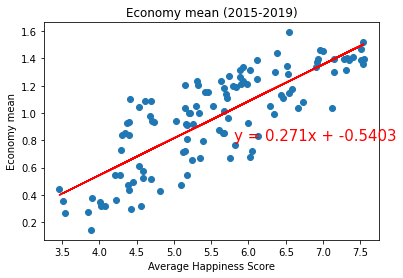

In [21]:
avg_country_plot = linear_regrression(country_mean["Happiness Score Mean"], country_mean["Economy mean"])
plt.title("Economy mean (2015-2019)")
plt.xlabel("Average Happiness Score")
plt.ylabel("Economy mean")
plt.savefig("Figure_File/Economy1.png")
plt.show()

In [22]:
latest = merged_GPD_df[["Country", "Economy (2022)", "Happiness Score (2022)"]]
latest = latest.sort_values("Economy (2022)", ascending=False)
latest.head(5)

,Country,Economy (2022),Happiness Score (2022)
21,Singapore,2.149,6.480
16,Ireland,2.129,7.041
0,Switzerland,2.026,7.512
3,Norway,1.997,7.365
14,United States,1.982,6.977


In [23]:
latest.mean()

Economy (2022)            1.447845
Happiness Score (2022)    5.667784
dtype: float64

The r-value is: 0.614400820625597


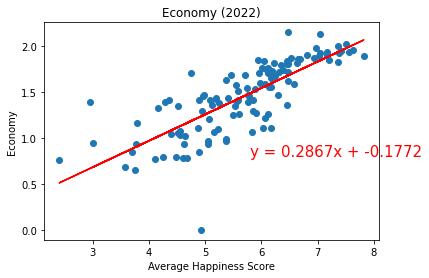

In [24]:
latest_GDP_plot = linear_regrression(latest["Happiness Score (2022)"], latest["Economy (2022)"])
plt.title("Economy (2022)")
plt.xlabel("Average Happiness Score")
plt.ylabel("Economy")
plt.savefig("Figure_File/Economy2.png")
plt.show()

In [30]:
twenty_two_only = merged_GPD_df[["Country", 'Rank (2022)', 'Happiness Score (2022)',
       'Family (2022)', 'Health (2022)', 'Freedom (2022)',
       'Perceptions of Corruption (2022)', 'Generosity (2022)']]
twenty_two_only.describe()

,Rank (2022),Happiness Score (2022),Family (2022),Health (2022),Freedom (2022),Perceptions of Corruption (2022),Generosity (2022)
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,68.732759,5.667784,0.924259,0.612310,0.528578,0.151750,0.149931
std,41.848247,1.082285,0.281805,0.155807,0.140097,0.129718,0.083154
min,1.000000,2.404000,0.000000,0.270000,0.000000,0.000000,0.000000
25%,33.750000,4.953750,0.736500,0.533750,0.457750,0.063500,0.089000
50%,65.000000,5.804500,1.005500,0.637500,0.546000,0.115000,0.134500
75%,106.250000,6.446250,1.148000,0.737250,0.627500,0.195500,0.202250
max,146.000000,7.821000,1.320000,0.866000,0.740000,0.587000,0.468000


In [39]:
filtered_df = twenty_two_only.loc[(twenty_two_only["Happiness Score (2022)"] > 5.667784) &
                                  (twenty_two_only["Family (2022)"] > 0.924259) &
                                 (twenty_two_only["Health (2022)"] > 0.612310) &
                                 (twenty_two_only["Freedom (2022)"] > 0.528578) &
                                 (twenty_two_only["Perceptions of Corruption (2022)"] > 0.151750) &
                                 (twenty_two_only["Generosity (2022)"] > 0.149931)]
filtered_df.dropna()
filtered_df.head(5)

,Country,Rank (2022),Happiness Score (2022),Family (2022),Health (2022),Freedom (2022),Perceptions of Corruption (2022),Generosity (2022)
1,Iceland,3.0,7.557,1.320,0.803,0.718,0.191,0.270
2,Denmark,2.0,7.636,1.243,0.777,0.719,0.532,0.188
3,Norway,8.0,7.365,1.239,0.786,0.728,0.474,0.217
4,Canada,15.0,7.025,1.188,0.783,0.659,0.368,0.217
6,Netherlands,5.0,7.415,1.206,0.787,0.651,0.419,0.271


In [40]:
filtered_df.to_csv("Output_data/filtered_df.csv", index_label="Index")